<a href="https://colab.research.google.com/github/IshantWadhwa4/Machine_Learning/blob/master/Supervisedlearning/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN 

K Nearest Neighbour

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data. Supervised learning, in the context machine learning, is a type of system in which both input and desired output data are provided. Input and output data are labelled for classification to provide a learning basis for future data processing. 

In [0]:
import pandas as pd

In [4]:
glass = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.info()
# no null value and data is already in the numeric form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Visualization

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
for col in glass.columns:
  sns.FacetGrid(data = glass,hue='Type',size=5).map(plt.scatter,'Al',col).add_legend()

In [0]:
sns.pairplot(glass,hue='Type')

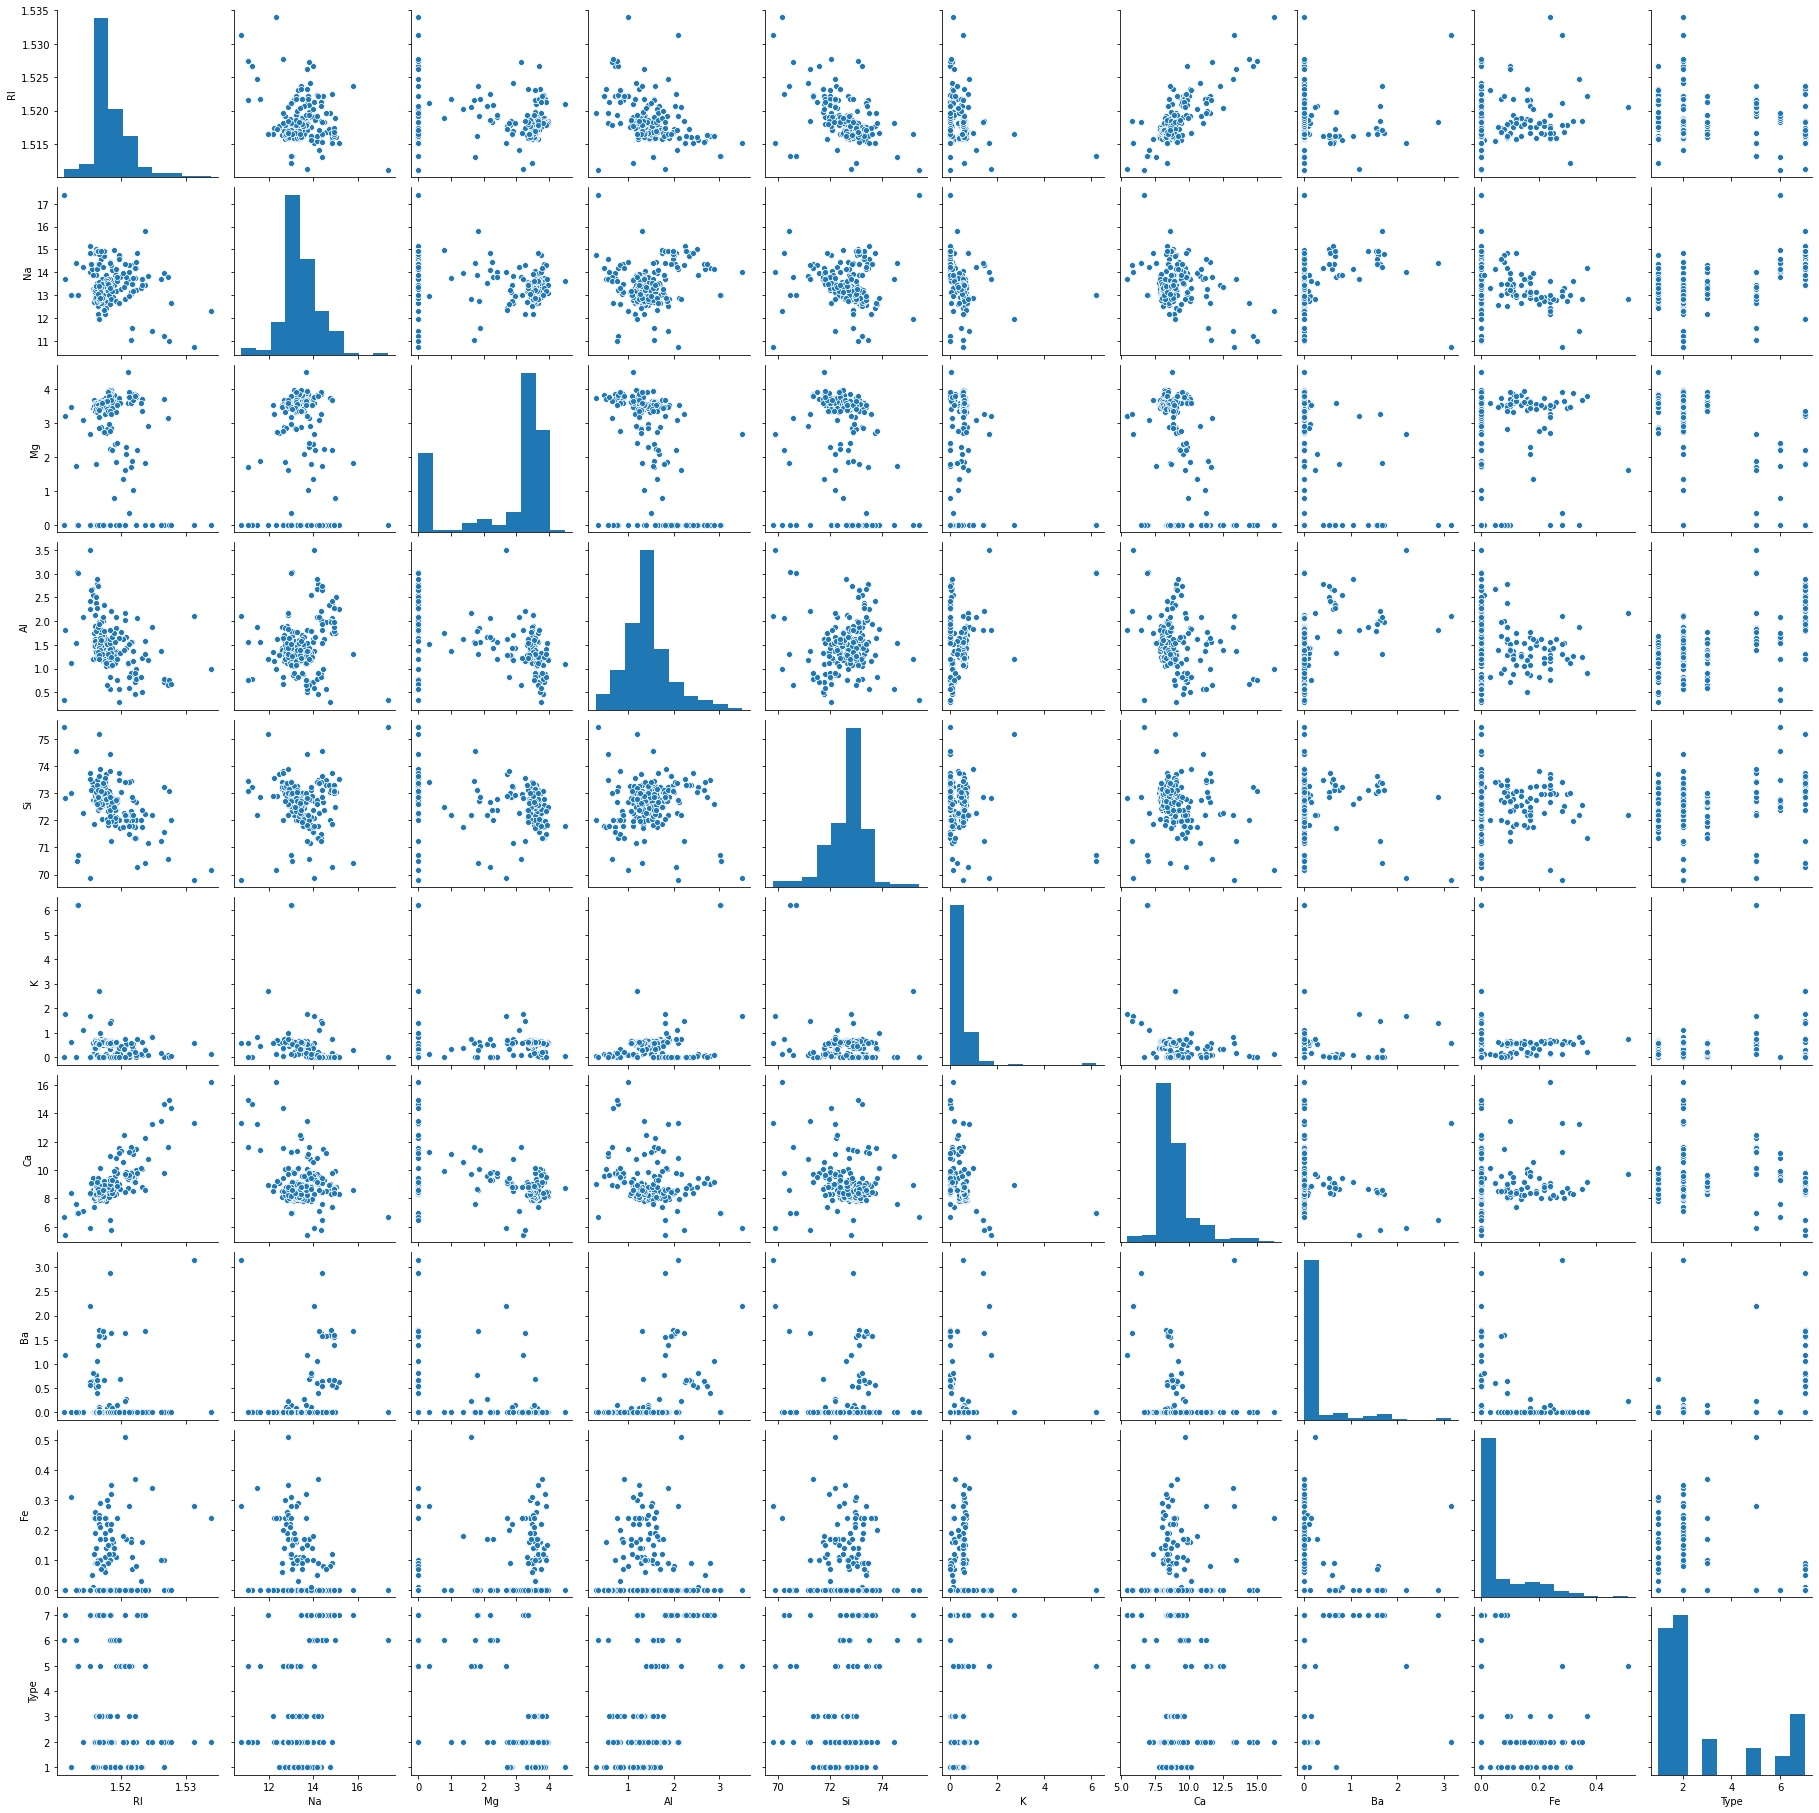

In [9]:
 # pairplot crash the colab 
 # the reson of pairplot is to see all the combination in one graph and imp is if you have "too much" overlap in data than its a hard problem.
 #glass['Type'].replace([3,4,5,6],8,inplace=True) 
 sns.pairplot(glass,hue='Type')


In [0]:
from pandas.plotting import andrews_curves

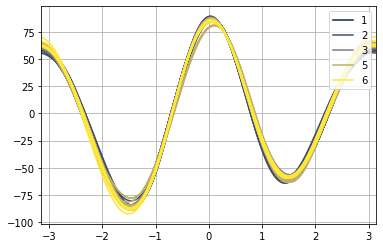

In [0]:
andrews_curves(glass[glass['Type'] != 7 ],'Type',colormap='cividis')

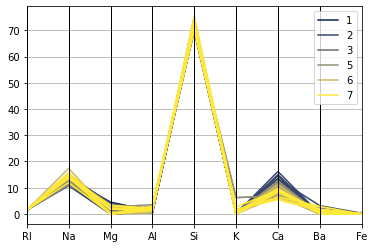

In [4]:
# parallel_coordinates

from pandas.plotting import parallel_coordinates
parallel_coordinates(glass, 'Type',colormap='cividis')

In [0]:
!pip install hiplot

In [0]:
# Hiplot ai.facebook https://ai.facebook.com/blog/hiplot-high-dimensional-interactive-plots-made-easy/
import hiplot as hip


In [0]:
glass_dict = glass.T.to_dict()

In [0]:
glass_list = []
for k,v in glass_dict.items():
  glass_list.append(v)
  

In [0]:
glass_list


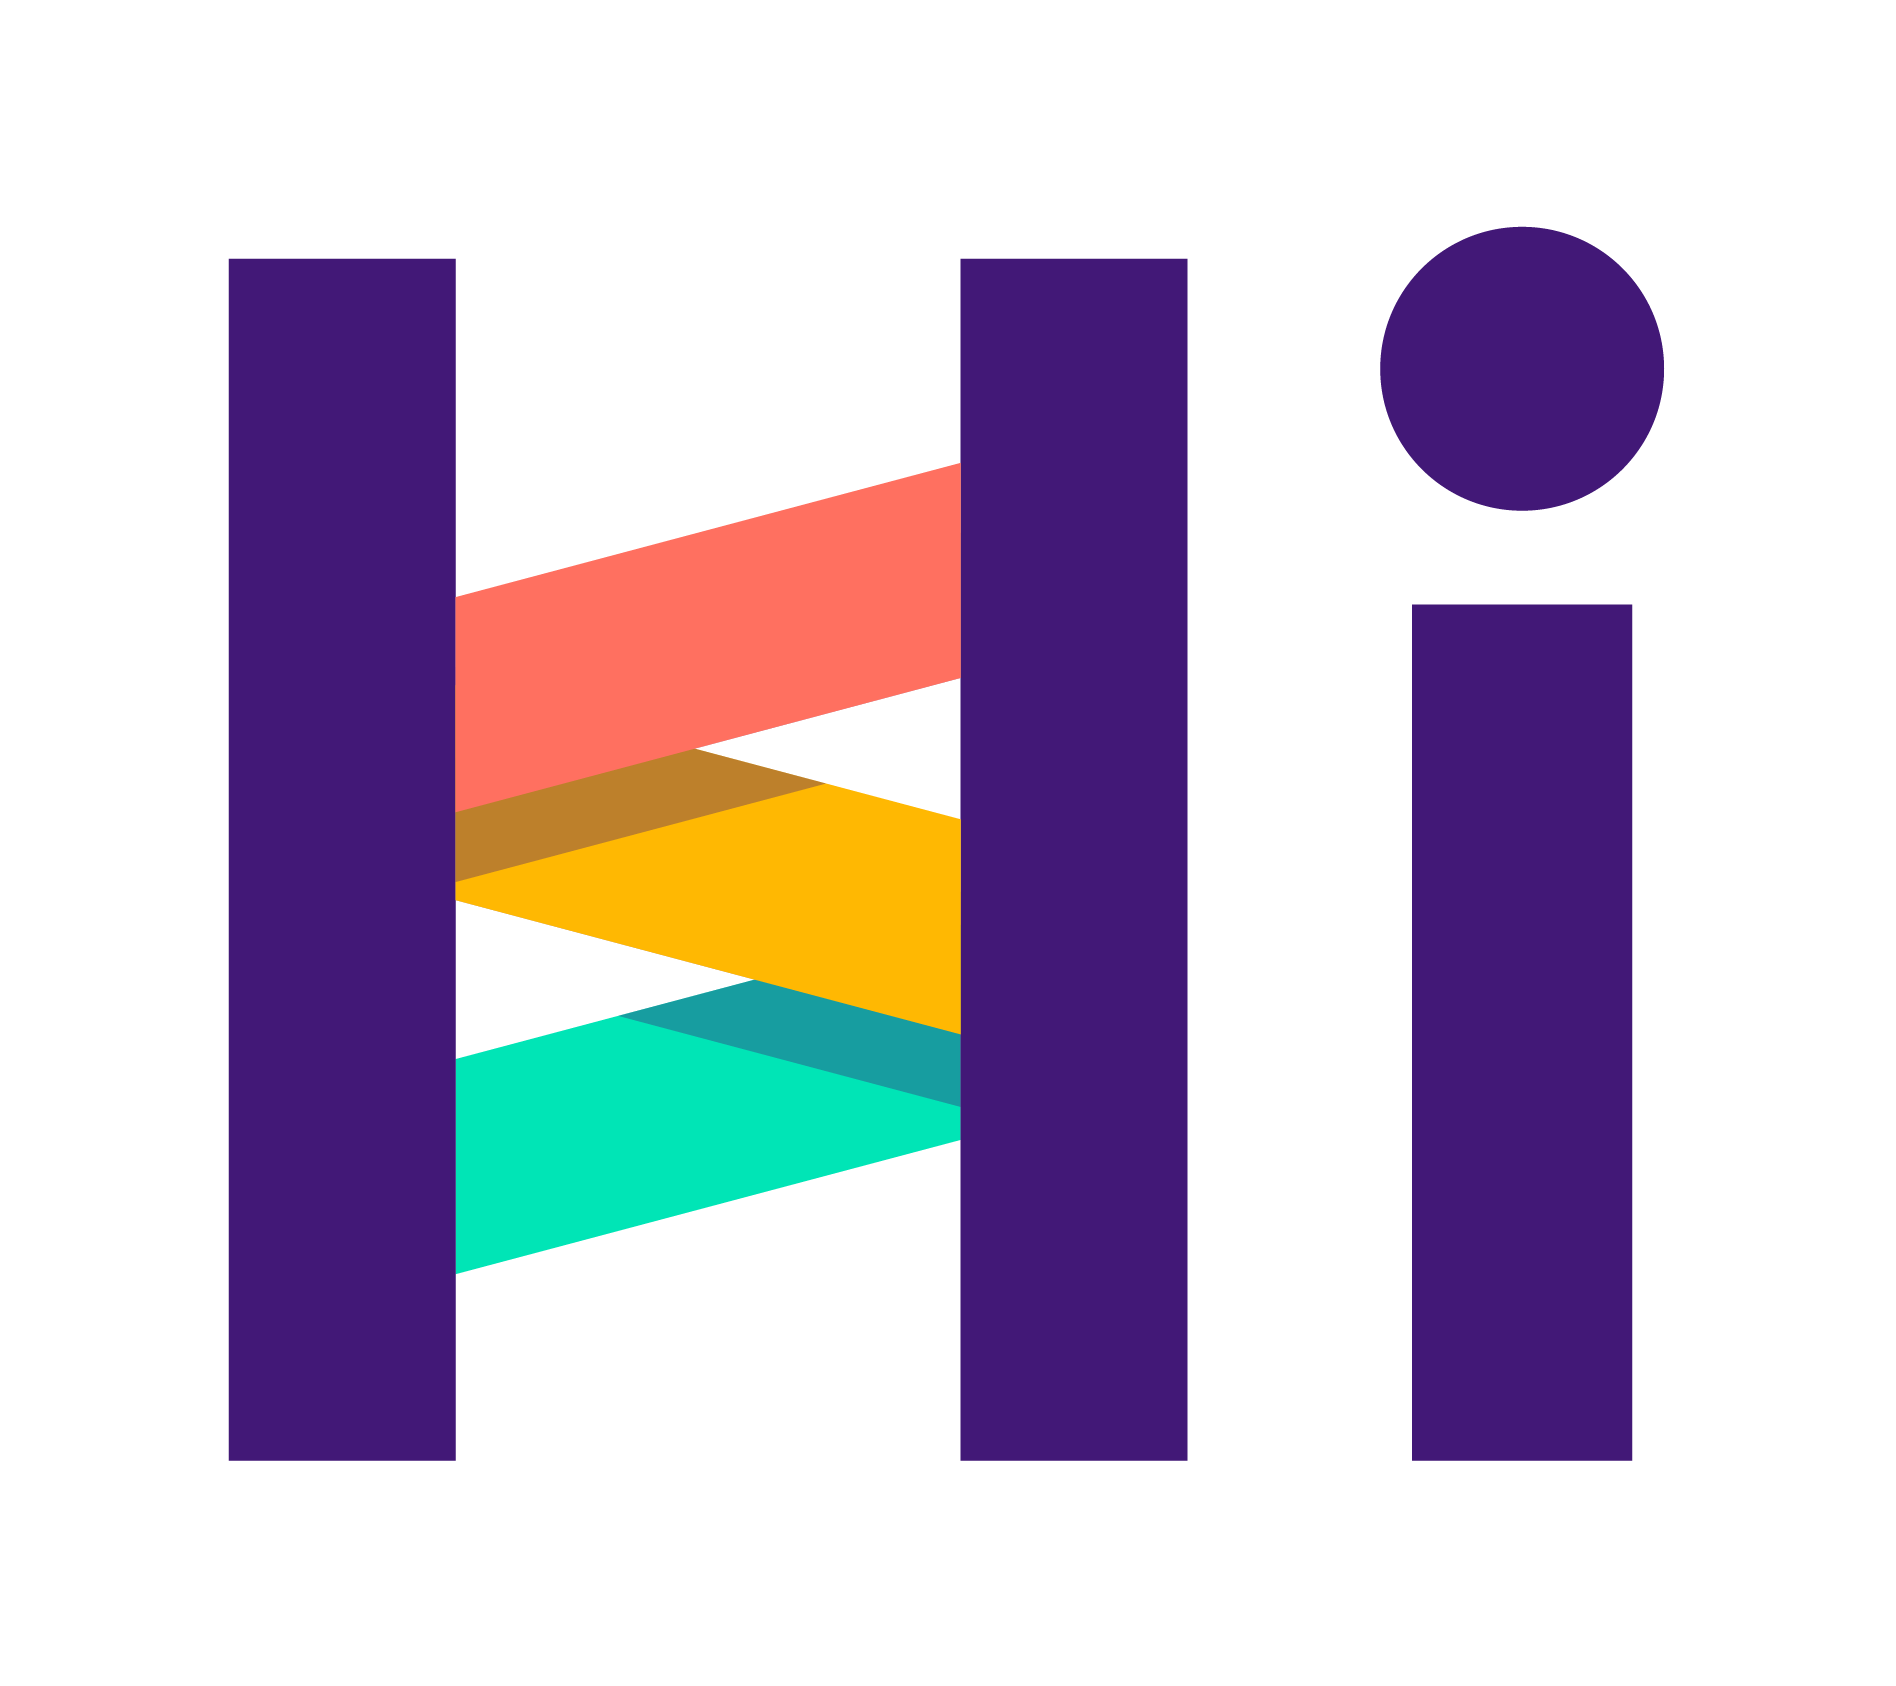

<IPython.core.display.Javascript object>

In [15]:
hip.Experiment.from_iterable(glass_list).display(force_full_width=True)

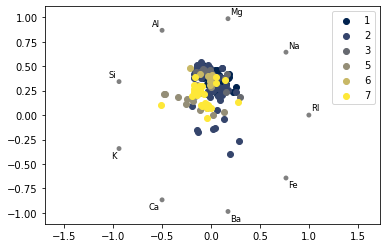

In [18]:
# radviz graph which give the relative information which class is important for which feature

from pandas.plotting import radviz
radviz(glass,'Type',colormap='cividis')

In [0]:
# you can see Ba and Fe Ca has class 2 which is more important

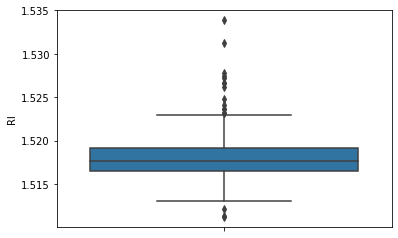

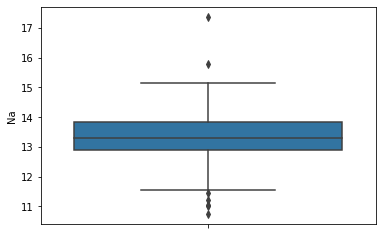

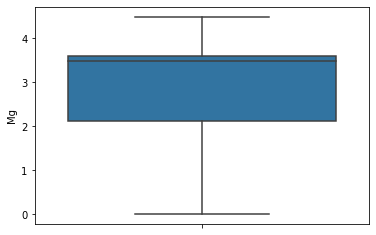

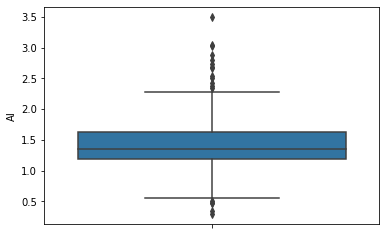

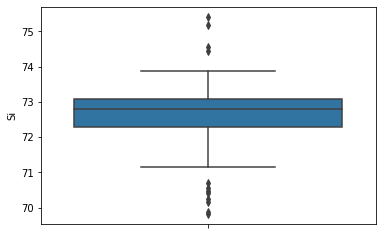

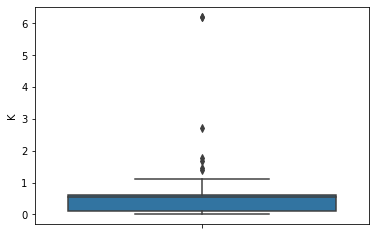

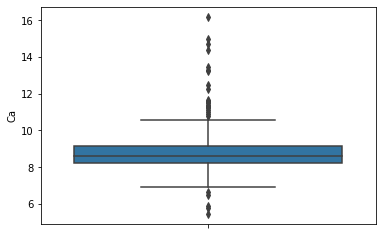

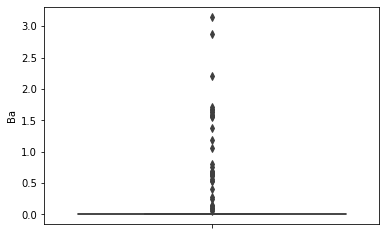

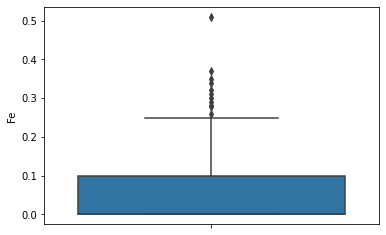

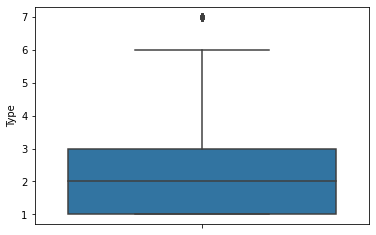

In [0]:
for col in glass.columns:
  sns.boxplot(y=col,data=glass)
  plt.show()

In [0]:
# from above we can see there are outliar in Fe,Ca,K,SI,AL,NA,RL
# check for Ba
# in Fe and Ba there are many 0 values 

# here 0 has some significant so we should not remove them
# 1. we need to scale them
# 2. normalise the data 

# Experiment 1 : In this we are considering outliar not removing it

In [0]:
glass[glass['Ba'] > 0.5 ]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
61,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
190,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7


In [0]:
# corelation b/w variables
corr_glass = glass.corr()

In [0]:
corr_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


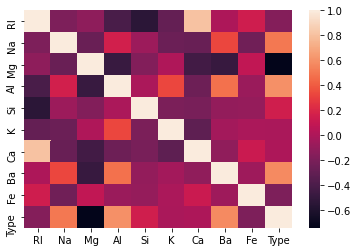

In [0]:
sns.heatmap(corr_glass)

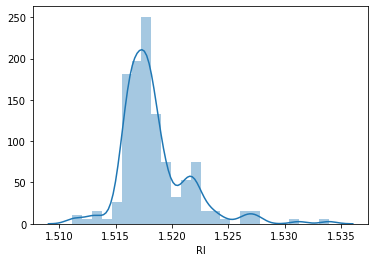

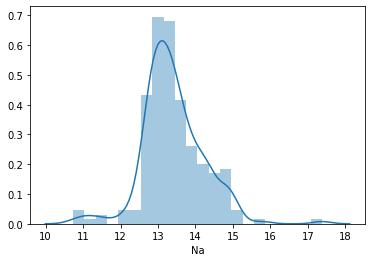

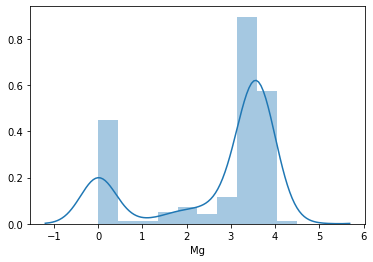

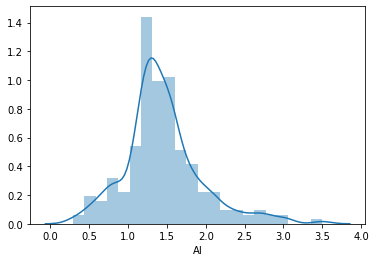

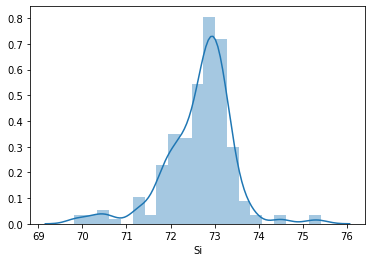

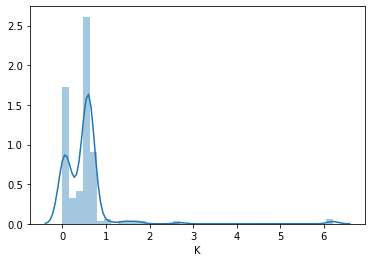

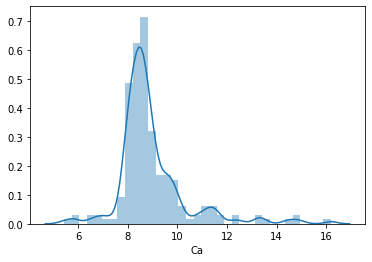

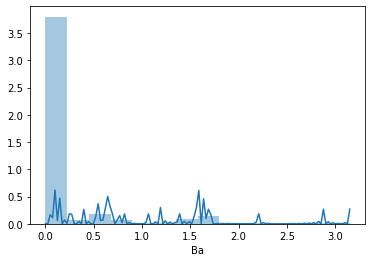

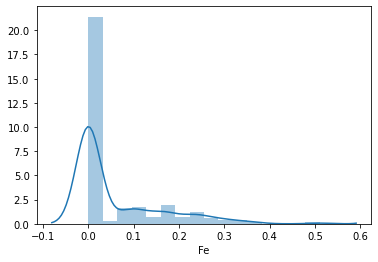

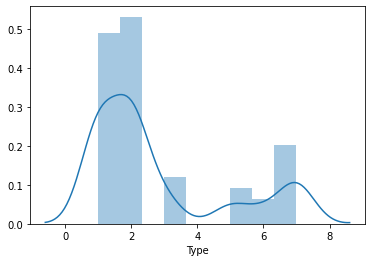

In [0]:
# see the data distribution for each variable
for col in glass.columns:
  sns.distplot(glass[col])
  plt.show()

In [0]:
glass.skew()
# K and Ba, ca are highly skew so we need to do normalise the data

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [0]:
# now we will do standered scaling
from sklearn.preprocessing import StandardScaler

glass_X_data = glass.drop('Type',axis = 1)
ss = StandardScaler()

ss.fit(glass_X_data)

glass_scale_X_data = ss.transform(glass_X_data) 

In [0]:
glass_data = pd.DataFrame(glass_scale_X_data)

In [0]:
glass_data['Type'] = glass['Type']

In [0]:
glass_data.columns = glass.columns

In [0]:
glass_data.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

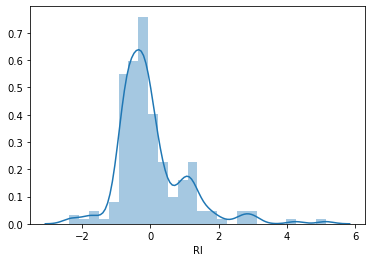

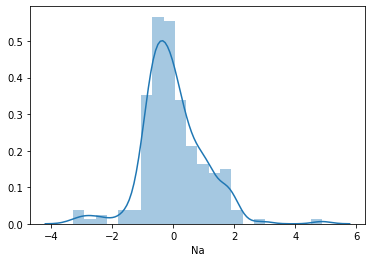

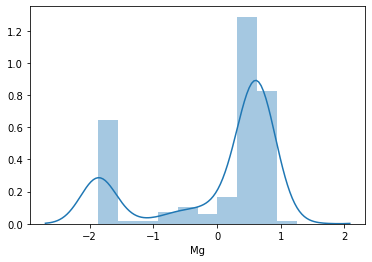

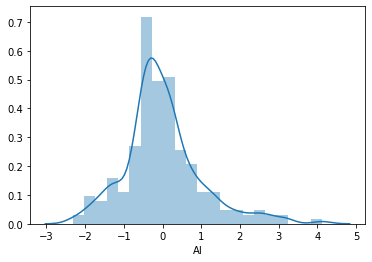

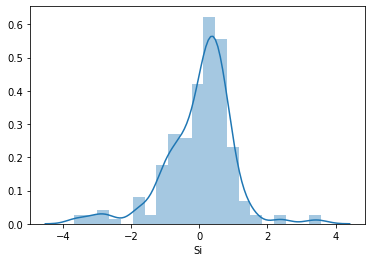

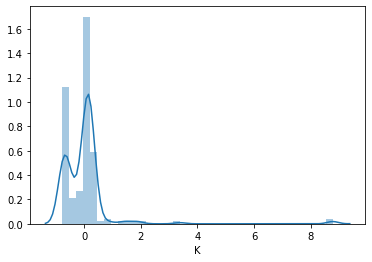

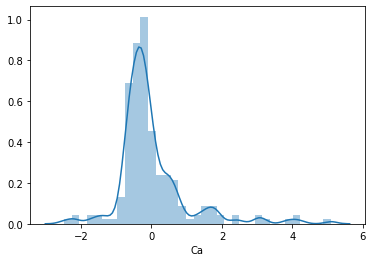

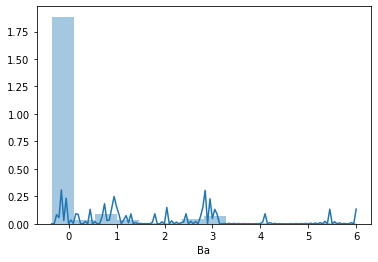

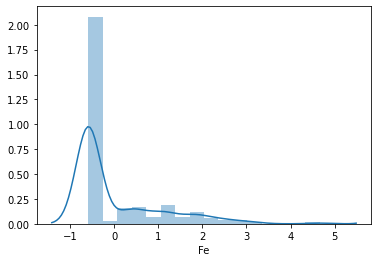

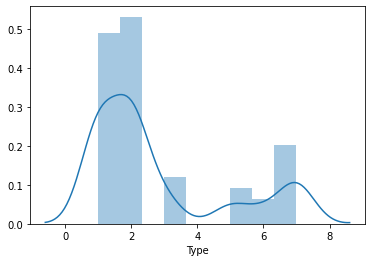

In [0]:
# see the data distribution for each variable
for col in glass_data.columns:
  sns.distplot(glass_data[col])
  plt.show()

In [0]:
# experiment 1

from sklearn.model_selection import train_test_split
x = glass_data.drop('Type',axis=1)
y = glass_data['Type']
X_train,X_test,y_train,y_test = train_test_split(x  , y , random_state = 1, test_size = 0.3)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2, metric='minkowski',n_jobs= -1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_predict = knn.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_predict,y_test)

0.7384615384615385

In [0]:
accuracy = {}

In [0]:
import time

In [0]:
for k in range(5,18):
  start_time = time.time()
  knn = KNeighborsClassifier(n_neighbors=k,p=2, metric='minkowski',n_jobs= -1)
  knn.fit(X_train,y_train)
  y_predict = knn.predict(X_test)  
  accuracy[k] = [accuracy_score(y_predict,y_test),time.time()-start_time]



In [0]:
accuracy

{5: [0.7384615384615385, 0.1115717887878418],
 6: [0.7076923076923077, 0.10567831993103027],
 7: [0.7230769230769231, 0.10573124885559082],
 8: [0.7230769230769231, 0.10573244094848633],
 9: [0.7384615384615385, 0.1060037612915039],
 10: [0.7538461538461538, 0.10605978965759277],
 11: [0.7538461538461538, 0.1058969497680664],
 12: [0.7384615384615385, 0.10591721534729004],
 13: [0.7076923076923077, 0.10619640350341797],
 14: [0.7076923076923077, 0.10616827011108398],
 15: [0.7230769230769231, 0.10573315620422363],
 16: [0.7384615384615385, 0.10662722587585449],
 17: [0.7076923076923077, 0.10575723648071289]}

In [0]:
accuracy_df = pd.DataFrame(accuracy).T

In [0]:
accuracy_df

,0,1
5,0.738462,0.111572
6,0.707692,0.105678
7,0.723077,0.105731
8,0.723077,0.105732
9,0.738462,0.106004
10,0.753846,0.106060
11,0.753846,0.105897
12,0.738462,0.105917
13,0.707692,0.106196
14,0.707692,0.106168


In [0]:
accuracy_df.columns = ['accuracy','exicution_Time']

In [0]:
accuracy_df

,accuracy,exicution_Time
5,0.738462,0.111572
6,0.707692,0.105678
7,0.723077,0.105731
8,0.723077,0.105732
9,0.738462,0.106004
10,0.753846,0.106060
11,0.753846,0.105897
12,0.738462,0.105917
13,0.707692,0.106196
14,0.707692,0.106168


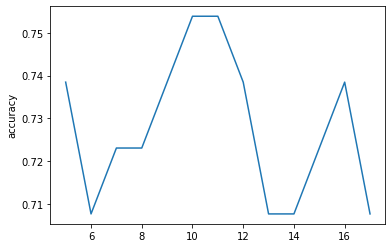

In [0]:
sns.lineplot(x= accuracy_df.index,y=accuracy_df['accuracy'])

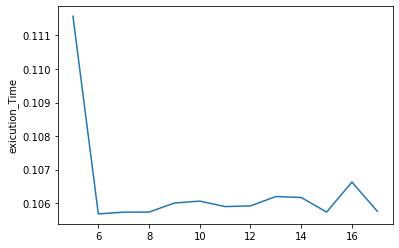

In [0]:
sns.lineplot(x= accuracy_df.index,y=accuracy_df['exicution_Time'])

In [0]:
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


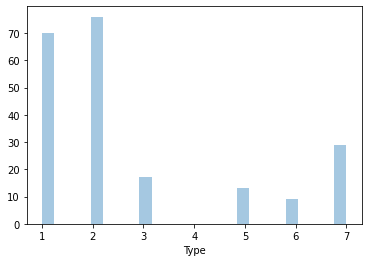

In [0]:
sns.distplot(glass_data['Type'], bins = 25, kde=False)

In [0]:
# from the above graph we can see the data is bias toward class 1 and 2 and 7
# now we can make 3 5 6 to a single class 8 
# we will do modeling inside modeling to see the result

# One way is doing upsampling (adding duplicate row of class 3,5,and 6 for narmal distribution )
# one way is downsampling to reduce the 1,2,7 classes rows
# One vs All model , in this we will say m1 is 1 or not 1, m2 is 2 or not 2 and so on. we have 7 model 
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html
# https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
# Experiment 2 

In [0]:
glass_data[:199][:].shape

(199, 10)

In [0]:
glass_data_2 = glass_data[:199][:].copy()

In [0]:
glass_data_2['Type'].replace([3,4,5,6],8,inplace=True) 

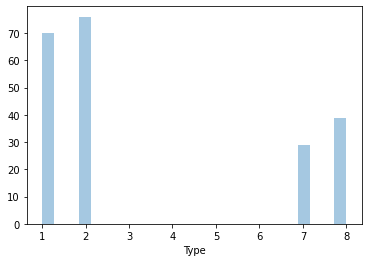

In [0]:
sns.distplot(glass_data_2['Type'],bins=25,kde=False)